In [23]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('MOVIE_IMDB.csv')

In [25]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [26]:
# number of nulls in each row
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4       14
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [27]:
# number of nulls in each column
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [28]:
# percentage of nulls in each column
round(df.isnull().sum() / df.shape[0] * 100, 2)

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

In [29]:
new_df = df.drop(columns=[
    "color",
    "director_facebook_likes",
    "actor_1_facebook_likes",
    "actor_2_facebook_likes",
    "actor_3_facebook_likes",
    "actor_2_name",
    "cast_total_facebook_likes",
    "actor_3_name",
    "duration",
    "facenumber_in_poster",
    "content_rating",
    "country",
    "movie_imdb_link",
    "aspect_ratio",
    "plot_keywords"
], axis=0)

new_df.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,NaN,NaN,NaN,7.1,0


In [30]:
# number of nulls in each row
new_df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       6
       ..
5038    2
5039    4
5040    1
5041    1
5042    0
Length: 5043, dtype: int64

In [31]:
# number of nulls in each column
new_df.isnull().sum()

director_name             104
num_critic_for_reviews     50
gross                     884
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
num_user_for_reviews       21
language                   12
budget                    492
title_year                108
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [32]:
# percentage of nulls in each column
null_ratio = new_df.isnull().sum() / df.shape[0] * 100
round(null_ratio, 2)

director_name              2.06
num_critic_for_reviews     0.99
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [33]:
cleared_df = new_df.dropna(axis=0, subset=null_ratio[null_ratio > 5.0].index)
cleared_df

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263700000.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,7000.0,2004.0,7.0,19000
5034,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35.0,English,7000.0,2005.0,6.3,74
5035,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,7000.0,1992.0,6.9,0
5037,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,9000.0,2011.0,6.4,413


In [34]:
cleared_df.isnull().sum()

director_name             0
num_critic_for_reviews    1
gross                     0
genres                    0
actor_1_name              3
movie_title               0
num_voted_users           0
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [35]:
# number of nulls in each row
cleared_df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
5       0
       ..
5033    0
5034    0
5035    0
5037    0
5042    0
Length: 3891, dtype: int64

In [36]:
# number of nulls in each column
cleared_df.isnull().sum()

director_name             0
num_critic_for_reviews    1
gross                     0
genres                    0
actor_1_name              3
movie_title               0
num_voted_users           0
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [37]:
# percentage of nulls in each column
round(cleared_df.isnull().sum() / cleared_df.shape[0] * 100, 2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.08
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

In [38]:
cleared_df.loc[list(cleared_df[cleared_df.language.isna()].index), 'language'] = 'English'
cleared_df.isna().sum()

director_name             0
num_critic_for_reviews    1
gross                     0
genres                    0
actor_1_name              3
movie_title               0
num_voted_users           0
num_user_for_reviews      0
language                  0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [39]:
round(cleared_df.isnull().sum() / cleared_df.shape[0] * 100, 2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

In [40]:
cleared_df = cleared_df.drop_duplicates()
cleared_df.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263700000.0,2012.0,6.6,24000


In [43]:
cleared_df = cleared_df.assign(profit=cleared_df.gross - cleared_df.budget)
cleared_df.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000,523505847.0
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0,9404152.0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000,-44925825.0
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000,198130642.0
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263700000.0,2012.0,6.6,24000,-190641321.0


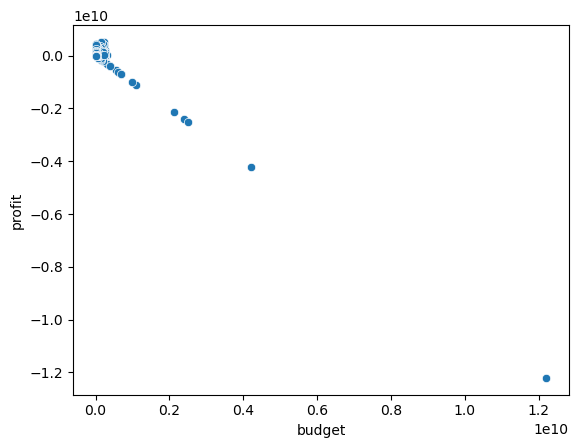

In [44]:
sns.scatterplot(x=cleared_df.budget, y=cleared_df.profit)
plt.show()

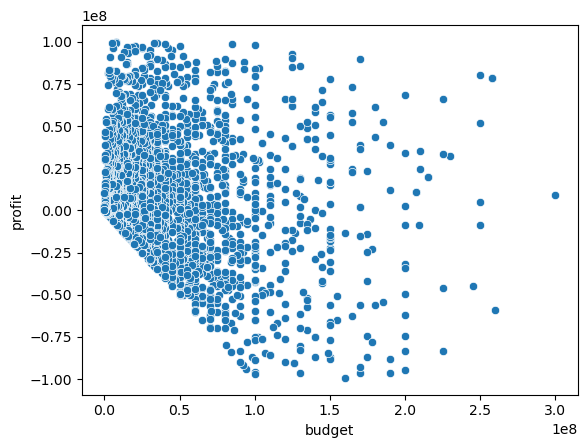

In [56]:
df_without_outliers = cleared_df[abs(cleared_df.profit) < 100000000]
sns.scatterplot(x=df_without_outliers.budget, y=df_without_outliers.profit)
plt.show()

In [50]:
cleared_df[cleared_df.profit < -1000000000]

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
2323,Hayao Miyazaki,174.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570.0,Japanese,2.400000e+09,1997.0,8.4,11000,-2.397702e+09
2334,Katsuhiro Ôtomo,105.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,79.0,Japanese,2.127520e+09,2004.0,6.9,973,-2.127110e+09
2988,Joon-ho Bong,363.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,279.0,Korean,1.221550e+10,2006.0,7.0,7000,-1.221330e+10
3005,Lajos Koltai,73.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,45.0,Hungarian,2.500000e+09,2005.0,7.1,607,-2.499804e+09
3423,Katsuhiro Ôtomo,150.0,439162.0,Action|Animation|Sci-Fi,Mitsuo Iwata,Akira,106160,430.0,Japanese,1.100000e+09,1988.0,8.1,0,-1.099561e+09
3859,Chan-wook Park,202.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,131.0,Korean,4.200000e+09,2005.0,7.7,4000,-4.199788e+09


In [51]:
cleared_df.nlargest(10, "profit")

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000,523505847.0
29,Colin Trevorrow,644.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150000000.0,2015.0,7.0,150000,502177271.0
26,James Cameron,315.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200000000.0,1997.0,7.7,26000,458672302.0
3024,George Lucas,282.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11000000.0,1977.0,8.7,33000,449935665.0
3080,Steven Spielberg,215.0,434949459.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10500000.0,1982.0,7.9,34000,424449459.0
17,Joss Whedon,703.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220000000.0,2012.0,8.1,123000,403279547.0
509,Roger Allers,186.0,422783777.0,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45000000.0,1994.0,8.5,17000,377783777.0
240,George Lucas,320.0,474544677.0,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115000000.0,1999.0,6.5,13000,359544677.0
66,Christopher Nolan,645.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185000000.0,2008.0,9.0,37000,348316061.0
439,Gary Ross,673.0,407999255.0,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959.0,English,78000000.0,2012.0,7.3,140000,329999255.0


In [62]:
flatten = lambda l: [item for sublist in l for item in sublist]
genres = set(flatten(cleared_df.genres.str.split('|').tolist()))
print(genres)

{'Thriller', 'Documentary', 'Biography', 'Sci-Fi', 'Action', 'Music', 'Western', 'Crime', 'Family', 'Mystery', 'Short', 'Musical', 'Comedy', 'War', 'Drama', 'Animation', 'Horror', 'Romance', 'Sport', 'Film-Noir', 'History', 'Fantasy', 'Adventure'}


In [73]:
movies_by_genre_dict = {genre: cleared_df[cleared_df.genres.str.contains(genre)] for genre in genres}
genres_count = {genre: len(movies_by_genre_dict[genre]) for genre in genres}
print(genres_count)

{'Thriller': 1118, 'Documentary': 67, 'Biography': 243, 'Sci-Fi': 497, 'Action': 962, 'Music': 248, 'Western': 60, 'Crime': 715, 'Family': 451, 'Mystery': 384, 'Short': 2, 'Musical': 103, 'Comedy': 1503, 'War': 160, 'Drama': 1944, 'Animation': 199, 'Horror': 391, 'Romance': 879, 'Sport': 151, 'Film-Noir': 1, 'History': 154, 'Fantasy': 514, 'Adventure': 787}


In [74]:
genres_mean_profit = {genre: movies_by_genre_dict[genre].profit.mean() for genre in genres}
print(genres_mean_profit)

{'Thriller': 4644834.937388193, 'Documentary': 6838889.567164179, 'Biography': 7711934.790123457, 'Sci-Fi': -15577344.259557344, 'Action': 4971130.581081081, 'Music': 15271409.028225806, 'Western': 2233042.7, 'Crime': 680683.9342657343, 'Family': 21747365.980044346, 'Mystery': 10532474.111979166, 'Short': 909267.0, 'Musical': 13970168.349514563, 'Comedy': 8159866.379906853, 'War': -23010531.725, 'Drama': -3307779.098251029, 'Animation': 939052.2914572865, 'Horror': -18042006.710997444, 'Romance': 9791503.893060295, 'Sport': 11437047.59602649, 'Film-Noir': -2292073.0, 'History': -9732728.980519481, 'Fantasy': 16894707.011673152, 'Adventure': 13264381.252858957}


In [75]:
selected_movies = cleared_df[(2007 <= cleared_df.title_year) & (cleared_df.title_year <= 2015) & (7.5 <= cleared_df.imdb_score) & (
            cleared_df.imdb_score <= 8.5)]
selected_movies.genres

0                         Action|Adventure|Fantasy|Sci-Fi
3                                         Action|Thriller
7       Adventure|Animation|Comedy|Family|Fantasy|Musi...
8                                 Action|Adventure|Sci-Fi
9                        Adventure|Family|Fantasy|Mystery
                              ...                        
4748                                    Documentary|Sport
4890                                          Documentary
4904                            Documentary|History|Music
4922                                        Drama|Romance
4931                                  Drama|Music|Romance
Name: genres, Length: 212, dtype: object

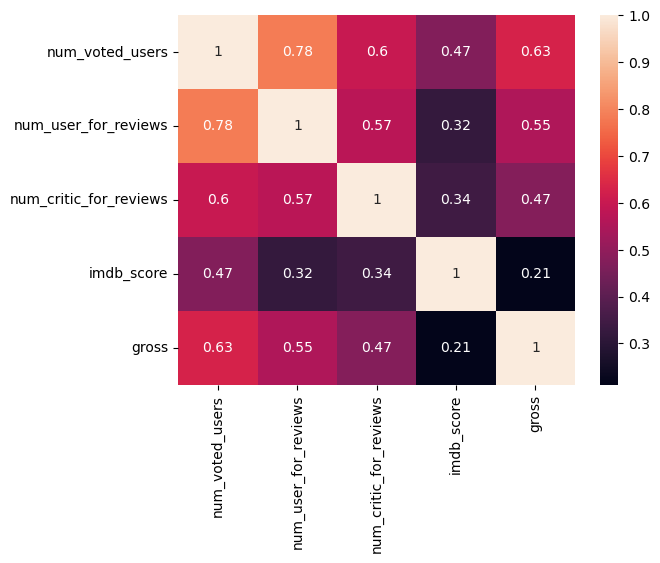

In [84]:
people_review = cleared_df[['num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'imdb_score', 'gross']]
people_review = (people_review - people_review.mean()) / people_review.std()
sns.heatmap(people_review.corr(), annot=True)
plt.show()